In [1]:
#University of Kansas / Trilogy Data Analytics Bootcamp 
#Project 1
#Question 2

#Jeff Bauman

#Data Sources
#df1: (*.csv export)
#    USDA - https://www.ers.usda.gov/data-products/county-level-data-sets/download-data.aspx
#    Unemployment and median household income for the U.S., States, and counties, 2000-19
#    
#df2: (*.csv export)
#    USDA - https://www.ers.usda.gov/data-products/county-level-data-sets/download-data.aspx
#    Population estimates for the U.S., States, and counties, 2010-19
# 
#df3: (Iterated API Requests)
#    Open Weather API
#    Api Key in Config file, Hyperlink in Code 


In [2]:
#Libraries, Dependencies Import
import pandas as pd

import json
import requests
from config import api_key

import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from scipy.stats import sem

In [3]:
#Import and Clean Unemployment CSV
df1 = pd.read_csv("Resources/Unemployment.csv")
df4 = df1

df2 = pd.read_csv("Resources/PopulationEstimates.csv", encoding = "ISO-8859-1", engine='python')

#df2; Had to use encoding = "ISO-8859-1", engine='python'
#Rather than normal encoding = "utf-8"

df1.head()
df2.head()

FIPStxt State       Area_Name  Rural-urban_Continuum Code_2003  \
0        0    US   United States                              NaN   
1     1000    AL         Alabama                              NaN   
2     1001    AL  Autauga County                              2.0   
3     1003    AL  Baldwin County                              4.0   
4     1005    AL  Barbour County                              6.0   

   Rural-urban_Continuum Code_2013  Urban_Influence_Code_2003  \
0                              NaN                        NaN   
1                              NaN                        NaN   
2                              2.0                        2.0   
3                              3.0                        5.0   
4                              6.0                        6.0   

   Urban_Influence_Code_2013  Economic_typology_2015 CENSUS_2010_POP  \
0                        NaN                     NaN     308,745,538   
1                        NaN                     NaN       4,779,736   
2                        2.0                     0.0          54,571   
3                        2.0                     5.0         182,265   
4                        6.0                     3.0          27,457   

  ESTIMATES_BASE_2010  ... R_DOMESTIC_MIG_2019 R_NET_MIG_2011 R_NET_MIG_2012  \
0         308,758,105  ...                 NaN            NaN            NaN   
1           4,780,125  ...                 1.9            0.6            1.2   
2              54,597  ...                 4.8            6.0           -6.2   
3             182,265  ...                24.0           16.6           17.5   
4              27,455  ...                -5.7            0.3           -6.9   

  R_NET_MIG_2013 R_NET_MIG_2014 R_NET_MIG_2015 R_NET_MIG_2016 R_NET_MIG_2017  \
0            NaN            NaN            NaN            NaN            NaN   
1            1.5            0.6            0.6            0.7            1.1   
2           -3.9            2.0           -1.7            4.8            0.8   
3           22.8           20.2           17.7           21.3           22.4   
4           -8.1           -5.1          -15.7          -18.2          -25.0   

  R_NET_MIG_2018 R_NET_MIG_2019  
0            NaN            NaN  
1            1.8            NaN  
2            0.5            NaN  
3           24.7            NaN  
4           -8.8            NaN  

[5 rows x 165 columns]

In [4]:
#df1 Unemployment
#Remove Unneeded Columns
#Using 2018 data since 2018 is most recent net migration data
cols = [3,4,5,6,7,8,10,11,12,14,15,16,18,19,20,22,23,24,26,27,28,
       30,31,32,34,35,36,38,39,40,42,43,44,46,47,48,50,51,52,54,55,56,
       58,59,60,62,63,64,66,67,68,70,71,72,74,75,76,78,79,80,82,83,84,
       86,87]

df1 = df1.drop(df1.columns[cols], axis=1)

#Kansas Only Data
df1_KS = df1.loc[df1["Stabr"] == "KS"]

#Drop State of Kansas totals
df1_KS = df1_KS.drop(df1_KS.index[0])

#Only shows information for merge, most recent 2019 data by County
df1_KS = df1_KS[["FIPStxt", "Stabr", "area_name", "Unemployment_rate_2018"]]

#Converting back to df1 for join simplicity later
df1 = df1_KS
df1.head()
df1.count()

FIPStxt                   105
Stabr                     105
area_name                 105
Unemployment_rate_2018    105
dtype: int64

In [5]:
#Remove Unneeded Columns
a=3
cols2 = []

for i in range(160):
    cols2.append(a)
    a = a + 1
cols2.append(164)

df2 = df2.drop(df2.columns[cols2], axis=1)

#print(cols2)
df2.head()

FIPStxt State       Area_Name  R_NET_MIG_2018
0        0    US   United States             NaN
1     1000    AL         Alabama             1.8
2     1001    AL  Autauga County             0.5
3     1003    AL  Baldwin County            24.7
4     1005    AL  Barbour County            -8.8

In [6]:
#Left join on df1 since all necessary KS County rows are included there
# Merge example
# df3 = pd.merge(df1, df2, on='Column ID')

df3 = pd.merge(df1, df2, on="FIPStxt", how="left")
#Check count, same as df1 from above - verified, 105
#df3.count()

df3.head()

FIPStxt Stabr            area_name  Unemployment_rate_2018 State  \
0    20001    KS     Allen County, KS                     3.9    KS   
1    20003    KS  Anderson County, KS                     3.4    KS   
2    20005    KS  Atchison County, KS                     4.5    KS   
3    20007    KS    Barber County, KS                     2.5    KS   
4    20009    KS    Barton County, KS                     3.2    KS   

         Area_Name  R_NET_MIG_2018  
0     Allen County            -2.6  
1  Anderson County             1.1  
2  Atchison County            -8.1  
3    Barber County           -23.5  
4    Barton County           -12.3

In [7]:
df_in = pd.DataFrame(df3.loc[df3["R_NET_MIG_2018"] >= 0])
df_in.head()

df_out = pd.DataFrame(df3.loc[df3["R_NET_MIG_2018"] < 0])
df_out.head()

#df_001 = pd.DataFrame(df.loc[df["Drug Regimen"] == x])

FIPStxt Stabr            area_name  Unemployment_rate_2018 State  \
0    20001    KS     Allen County, KS                     3.9    KS   
2    20005    KS  Atchison County, KS                     4.5    KS   
3    20007    KS    Barber County, KS                     2.5    KS   
4    20009    KS    Barton County, KS                     3.2    KS   
5    20011    KS   Bourbon County, KS                     4.1    KS   

         Area_Name  R_NET_MIG_2018  
0     Allen County            -2.6  
2  Atchison County            -8.1  
3    Barber County           -23.5  
4    Barton County           -12.3  
5   Bourbon County            -4.2

In [8]:
#Unemployment list for Scatter plot (Mig In)
df_ue_in = df_in.drop(df_in.columns[[0,1,2,4,5,6]], axis=1)
#df_ue.head()

#County UE 2018
list_ue_in = []

for i in range((df_ue_in.shape[1])):
    list_ue_in.append(list(df_ue_in.iloc[:, i]))

print(list_ue_in)

[[3.4, 3.9, 2.4, 2.9, 3.5, 3.0, 3.1, 2.0, 2.8, 3.2, 2.4, 2.8, 3.6, 5.8, 3.1, 2.6, 3.5, 2.7, 2.3, 2.1, 3.7, 2.7, 2.0, 2.7, 2.8, 2.7, 3.1, 4.3]]


In [9]:
#Migration list for Scatter plot (Mig in)
df_mig_in = df_in.drop(df_in.columns[[0,1,2,3,4,5]], axis=1)

#County Mig 2018
list_mig_in = []

for i in range((df_mig_in.shape[1])):
    list_mig_in.append(list(df_mig_in.iloc[:, i]))

print(list_mig_in)

[[1.1, 0.0, 1.5, 0.7, 2.7, 3.5, 3.2, 1.8, 6.0, 4.3, 0.0, 10.3, 0.5, 8.6, 0.1, 2.7, 6.9, 14.0, 1.4, 0.2, 8.7, 4.4, 7.6, 2.1, 3.6, 6.6, 6.8, 15.5]]


In [10]:
#Unemployment list for Scatter plot (Mig Out)
df_ue_out = df_out.drop(df_out.columns[[0,1,2,4,5,6]], axis=1)
df_ue_out.head()

#County UE 2018
list_ue_out = []

for i in range((df_ue_out.shape[1])):
    list_ue_out.append(list(df_ue_out.iloc[:, i]))

print(list_ue_out)

[[3.9, 4.5, 2.5, 3.2, 4.1, 3.0, 3.4, 2.6, 3.7, 2.3, 3.1, 3.4, 4.6, 2.4, 3.3, 3.9, 3.4, 2.3, 3.3, 2.3, 2.7, 2.4, 2.5, 3.5, 4.6, 2.1, 2.7, 2.0, 3.4, 1.9, 2.8, 3.2, 2.1, 2.4, 2.9, 3.2, 2.7, 2.3, 3.9, 2.4, 2.1, 3.5, 2.5, 2.0, 2.2, 4.2, 3.2, 4.8, 2.6, 2.5, 2.8, 3.1, 2.5, 2.7, 3.5, 2.9, 3.1, 2.9, 3.0, 1.9, 3.7, 3.2, 3.4, 2.2, 2.7, 2.4, 2.6, 2.5, 2.9, 3.5, 2.5, 3.1, 2.4, 2.6, 2.1, 4.3, 4.8]]


In [11]:
#Migration list for Scatter plot (Mig Out)
df_mig_out = df_out.drop(df_out.columns[[0,1,2,3,4,5]], axis=1)

#County Mig 2018
list_mig_out = []

for i in range((df_mig_out.shape[1])):
    list_mig_out.append(list(df_mig_out.iloc[:, i]))

print(list_mig_out)

[[-2.6, -8.1, -23.5, -12.3, -4.2, -0.2, -2.3, -16.8, -1.8, -12.4, -2.0, -18.7, -0.4, -8.6, -3.5, -2.1, -6.9, -15.8, -5.2, -4.8, -16.1, -16.8, -19.9, -2.4, -49.6, -5.7, -34.5, -6.5, -4.8, -9.2, -6.9, -5.7, -15.0, -15.2, -5.6, -3.3, -3.5, -7.4, -11.8, -9.3, -4.6, -1.7, -3.4, -32.7, -4.7, -7.0, -26.8, -4.9, -11.0, -20.9, -5.4, -13.6, -15.4, -16.9, -4.4, -7.8, -9.2, -1.2, -4.4, -7.9, -3.8, -29.1, -5.2, -4.0, -7.6, -8.0, -6.7, -17.2, -6.5, -4.1, -22.1, -13.1, -26.0, -5.1, -13.2, -4.3, -5.6]]


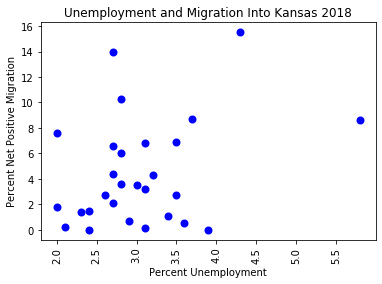

In [12]:
plt.scatter(list_ue_in, list_mig_in, linewidth = 2.0, color ="blue")

plt.title("Unemployment and Migration Into Kansas 2018")
plt.xlabel("Percent Unemployment")
plt.ylabel("Percent Net Positive Migration")
plt.xticks(rotation='vertical')

plt.savefig("KansasUE_MigIn_2018.png")

plt.show()


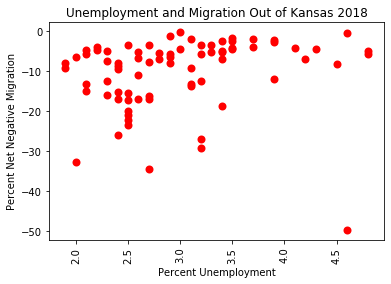

In [13]:
plt.scatter(list_ue_out, list_mig_out, linewidth = 2.0, color ="red")

plt.title("Unemployment and Migration Out of Kansas 2018")
plt.xlabel("Percent Unemployment")
plt.ylabel("Percent Net Negative Migration")
plt.xticks(rotation='vertical')

plt.savefig("KansasUE_MigOut_2018.png")

plt.show()

In [14]:
#Top Ten Most Populus Cities in the US
# Source https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population
# New York, Los Angeles, Chicago, Houston, Phoenix
# Philadelphia, San Antonio, San Diego, Dallas, San Jose

Cities = ["New York", "Los Angeles", "Chicago", "Houston", "Phoenix", 
          "Philadelphia", "San Antonio", "San Diego", "Dallas", "San Jose"]
Cities[0]

#Found FIPS by Using USDA Excel File and loosely associated to corresponding county (largest population when sorted)
# And confirming by Google Search
FIPS = [36047,6037,17031,48201,4013,42101,48029,6073,48113,6085]
#Approx Corresponding 

Weather_df = pd.DataFrame({"City": Cities, "FIPStxt" : FIPS})

Weather_df.head(10)

City  FIPStxt
0      New York    36047
1   Los Angeles     6037
2       Chicago    17031
3       Houston    48201
4       Phoenix     4013
5  Philadelphia    42101
6   San Antonio    48029
7     San Diego     6073
8        Dallas    48113
9      San Jose     6085

In [15]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "London"

Humidity = []
Temperature = []
Lat = []
Lon = []

# Build query URL

for x in Cities:
    query_url = url + "appid=" + api_key + "&q=" + x
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    Humidity.append(weather_json["main"]["humidity"])
    preround = ((weather_json["main"]["temp"]) - 273.15)*(9/5)+32
    preround = round(preround,2)
    Temperature.append(preround)
    Lat.append(weather_json["coord"]["lat"])
    Lon.append(weather_json["coord"]["lon"])

Weather_df = pd.DataFrame({"City": Cities, "FIPStxt" : FIPS, "Humidity": Humidity, "Temperature": Temperature,
                          "Latitude": Lat, "Longitude": Lon})

Weather_df.head()    

#Merge Weather API Data
# with more recent 2019 Unemployment Data
#df1_KS = df1_KS[["FIPStxt", "Stabr", "area_name", "Unemployment_rate_2018"]]


df5 = pd.merge(Weather_df, df4, on="FIPStxt", how="left")
df5 = df5[["City", "FIPStxt", "Humidity", "Temperature", "Latitude", "Longitude", "Stabr", "area_name", "Unemployment_rate_2019"]]


df5.head()

City  FIPStxt  Humidity  Temperature  Latitude  Longitude Stabr  \
0     New York    36047        38        87.03     40.71     -74.01    NY   
1  Los Angeles     6037         8        92.68     34.05    -118.24    CA   
2      Chicago    17031       100        75.47     41.85     -87.65    IL   
3      Houston    48201        56        93.76     29.76     -95.36    TX   
4      Phoenix     4013         7        93.61     33.45    -112.07    AZ   

                area_name  Unemployment_rate_2019  
0        Kings County, NY                     4.1  
1  Los Angeles County, CA                     4.4  
2         Cook County, IL                     3.8  
3       Harris County, TX                     3.8  
4     Maricopa County, AZ                     4.0

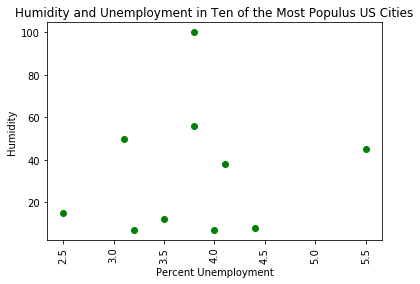

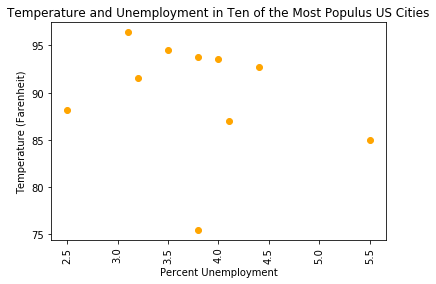

In [16]:
#Ten Most Populus Cities 
# UE List Build

#Unemployment 
Weather_df_UE = df5["Unemployment_rate_2019"]

plt.scatter([Weather_df_UE],Humidity, color="green")

plt.title("Humidity and Unemployment in Ten of the Most Populus US Cities")
plt.xlabel("Percent Unemployment")
plt.ylabel("Humidity")
plt.xticks(rotation='vertical')

plt.savefig("USAUE_Hum_2019.png")

plt.show()

plt.scatter([Weather_df_UE],Temperature, color="orange")

plt.title("Temperature and Unemployment in Ten of the Most Populus US Cities")
plt.xlabel("Percent Unemployment")
plt.ylabel("Temperature (Farenheit)")
plt.xticks(rotation='vertical')

plt.savefig("USAUE_Temp_2019.png")

plt.show()


In [17]:
#Notes

# #Import and Clean Unemployment CSV
# df1 = pd.read_csv("Resources/Unemployment.csv")

# df1.head()

# #Remove Unneeded Columns
# cols = [0,3,4,5,6,7,8,10,11,12,14,15,16,18,19,20,22,23,24,26,27,28,
#        30,31,32,34,35,36,38,39,40,42,43,44,46,47,48,50,51,52,54,55,56,
#        58,59,60,62,63,64,66,67,68,70,71,72,74,75,76,78,79,80,82,83,84,
#        86,87]

# df1 = df1.drop(df1.columns[cols], axis=1)

# #Kansas Only Data
# df1_KS = df1.loc[df1["Stabr"] == "KS"]

# #Kansas Total Data
# KS_Tot = df1_KS.loc[df1_KS["area_name"] == "Kansas"]

# #Loop append list for graph
# Column_list =[] 
  
# # Iterate over each row 
# for i in range((KS_Tot.shape[1])): 
  
#     Column_list.append(list(KS_Tot.iloc[:, i])) 


# Column_list = Column_list[2:]

# #Append list for April 2020 data, bls.gov/eag/eag.us.htm
# #likely less than current actual since UE has increased
# Column_list.append([11.2])

# # Print the list 
# print(Column_list)

# #Same for US total

# df1_USA = df1.loc[df1["Stabr"] == "US"]
# USA_Tot = df1_USA.loc[df1_USA["area_name"] == "United States"]

# #USA_Tot = df1.iloc[0]

# USA_Tot

# #USA_Tot = df1.loc[df1["area_name"] == "UnitedStates"]
# #USA_Tot

# #Loop append list for graph
# Column_list2 =[] 
  
# # Iterate over each row 
# for i in range((USA_Tot.shape[1])): 
  
#     Column_list2.append(list(USA_Tot.iloc[:, i])) 


# Column_list2 = Column_list2[2:]

# #Append list for April 2020 data, bls.gov/eag/eag.us.htm
# #likely less than current actual since UE has increased
# Column_list2.append([14.7])

# # Print the list 
# print(Column_list2)

# #Unemployment Kansas & United States
# x_axis = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
# y_axis = Column_list

# plt.plot(x_axis, y_axis, linewidth=2.0, color="blue")

# #Unemployment USA
# y_axis2 = Column_list2
# plt.plot(x_axis, y_axis2, linewidth = 2.0, color ="red")

# # #rotate x axis markers, add x and y labels, add title
# plt.title("Unemployment in Kansas (2000-2019)")
# plt.xlabel("Year")
# plt.ylabel("Unemployment Percentage")
# plt.xticks(rotation='vertical')

# plt.show()

In [18]:
#Notes

#Clean with Pandas
#Describe Data Exploration and Cleanup Process
    #1. Initially had a hard time deciding one data sources and refining the question to answer.
    #   This led me using the Open Weather API for historical data, which is only possible by cost.
    #   Google searching produced options that would work for data scraping which is beyond the 
    #   scope of this assignment. Open Weather API will be used only for current data which will 
    #   hopefully provide relevant data to answer the question, since humidity and temperature are
    #   possibly relevant (read: little variation in proportionality from location to location over time) 
    #   from area to area.
#Matplotlib at least two visualizations per question
#Save PNG for PowerPoint usage
#API Request
#Short write-up summarizing major findings

#Scale up from Kansas to the whole United States
#More noticeable trend upon scale up?


#Reset Column Names
#df1.columns = [df1.iloc[6]]

#Remove First Seven Rows, Unneeded
#df1 = df1.iloc[7:]

In [19]:
# #Notes
# # for x in Cities:
# #     print(x)

# #UE by Temp
# #UE by Humidity

# print(weather_json["main"]["temp"])
# print(weather_json["main"]["humidity"])
# print(weather_json["coord"]["lat"])
# print(weather_json["coord"]["lon"])

# preround = ((weather_json["main"]["temp"]) - 273.15)*(9/5)+32
# preround = round(preround,2)
# preround

# # Get weather data
# weather_response = requests.get(query_url)
# weather_json = weather_response.json()

# # Get the temperature from the response
# print(f"The weather API responded with: {weather_json}.")